In this notebook, we plot user addition/attrition diagram, as per "Computation Methods For Dynamic Graphs", Cortes et. al.

Our data is a text file whose each line is of the following format:

>user1;user2;date;{Q1;...;Q2;P1;...;P2};msg

Here, fields, which are in the {}, are optional.

For example:

>Raoli;Torsolo;2012-10-30;Q1056;Ciao, tanto per capire come funziona ho preso una voce da Pedia e ho creato un elemento. Però su Wikidata si tratta semplicemente di inserire un elenco di link alle altre wikipedia. Di Wikiquote, source non c'è traccia. Per esempio in <b><a href="/wiki/Q1056" title="Q1056">Italo Balbo</a></b> ho aggiunto tutti i link e in 8 minuti ho fatto quello che potevo fare in 30 secondi. Ho dovuto copia-incollare tutti i link uno ad uno, apsettare che prendesse la lingua e aspettare che salvasse. Sai se c'è un modo per trasferirli in massa senza bot? Grazie <a href="/wiki/User:Raoli" title="User:Raoli">Raoli</a> (<a href="/wiki/User_talk:Raoli" title="User talk:Raoli">talk</a>) 21:33, 30 October 2012 (UTC)


Functions to compute node addition.

In [263]:
# pathToDataFile: path to the weekly communication in our dataset.
# return a list of set of users each week
def computeWeeklyUsers(pathToDataFile):
    f = open(pathToDataFile, 'r')
    users = []
    for l in f:
        items = l.split(";")
        users.append(items[0])
        users.append(items[1])
    return set(users)  

def computeListOfWeeklyUsers(filePrefix, numberOfWeeks):
    result = []
    for i in range(0,numberOfWeeks):
        result.append(computeWeeklyUsers(filePrefix + str(i)))
    return result
   
def computeListOfCummulativeWeeklyUsers(filePrefix, numberOfWeeks):
    weeklySetofUsers = computeListOfWeeklyUsers(filePrefix, numberOfWeeks)
    result = []
    cumul = set()
    for i in range(0, len(weeklySetofUsers)):
        cumul = cumul.union(weeklySetofUsers[i])
        result.append(cumul)
    return result


def computeNewUserSize(listOfCumulWeeklyUsers):
    result = []
    result.append(len(listOfCumulWeeklyUsers[0]))
    for i in range(1, len(listOfCumulWeeklyUsers)):
        result.append(len(listOfCumulWeeklyUsers[i]) - len(listOfCumulWeeklyUsers[i-1]))
    return result
    
# compute cummulative percent of unique users
# newUserSize: a list of number of unique users seen at each week
def computeCumulativePercentNodeAddition(filePrefix, numberOfWeeks):
    listOfCumulWeeklyUsers = computeListOfCummulativeWeeklyUsers(filePrefix, numberOfWeeks)
    newUserSize = computeNewUserSize(listOfCumulWeeklyUsers);
    cumulPercent = []
    for i in range(0,len(newUserSize)):
        cumulPercent.append(sum(newUserSize[0:i+1]))
    totalUser = sum(newUserSize)
    cumulPercent = [(x/totalUser)*100 for x in cumulPercent]
    return cumulPercent
        

Function to compute node attrition. How do we compute node attrition?

Node attrition = *The number of nodes that we see for the last time in week i*

U(i) = set of users seen in week i.
U(i+1,n) = set of users seen from week (i+1) till week n.
nodeAttrition = |U(i) - U(i+1),n)|

In [264]:
def setOfUsersFrom(startWeek, weeklyUserSet):
    if startWeek < 0 or startWeek > len(weeklyUserSet):
        raise ValueError
    result = set()
    for i in range(startWeek, len(weeklyUserSet)):
        result = result.union(weeklyUserSet[i])
    return result

def computeNodeAttritions(weeklyUserSet):
    attritions = []
    for i in range(0, len(weeklyUserSet)):
        a = len(weeklyUserSet[i] - setOfUsersFrom(i+1, weeklyUserSet))
        attritions.append(a)
    return attritions

def computeCumulativePercentNodeAttrition(nodeAttritions):
    total = sum(nodeAttritions)
    cumul = [sum(nodeAttritions[0:i]) for i in range(1,len(nodeAttritions)+1)]
    percent = [x*100/total for x in cumul]
    return percent





In [288]:
# cumulPercent: a list of cummulative percent of unique users seen at week i
import matplotlib.pyplot as plt
def plotAddAttr(additionPercent, attritionPercent):
    plt.plot([w + 1 for w in range(0, len(additionPercent))],additionPercent)
    plt.plot([w + 1 for w in range(0, len(attritionPercent))],attritionPercent)
    plt.ylabel("Cummulative Percentage")
    plt.xlabel("Study Week Observed")

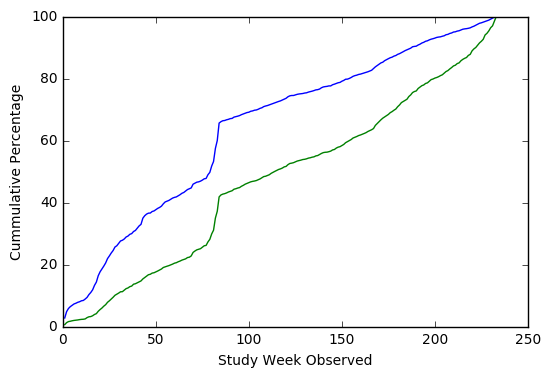

In [289]:
# node addition
additionPercent = computeCumulativePercentNodeAddition(filePrefix="../data/wtp-networksv2//wtpnetwork_timestamp.csv_", numberOfWeeks=233)

# node attrition
weeklyUserSet = computeListOfWeeklyUsers(filePrefix="../data/wtp-networksv2//wtpnetwork_timestamp.csv_", numberOfWeeks=233)
nodeAttrition = computeNodeAttritions(weeklyUserSet)
attritionPercent = computeCumulativePercentNodeAttrition(nodeAttrition)

# plot
plotAddAttr(additionPercent,attritionPercent)
plt.show()


Does it means we are loosing people as fast as we getting people.